In [2]:
# Import dependencies
import pandas as pd
import datetime as dt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load and read data
file = "Bank Target Marketing Dataset.csv"
df=pd.read_csv(file,parse_dates=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Exploratory Data Analysis

In [4]:
# See the shape of data
df.shape

(56373, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40672 entries, 3 to 56371
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40672 non-null  int64 
 1   job        40672 non-null  object
 2   marital    40672 non-null  object
 3   education  40672 non-null  object
 4   default    40672 non-null  object
 5   balance    40672 non-null  int64 
 6   housing    40672 non-null  object
 7   loan       40672 non-null  object
 8   contact    40672 non-null  object
 9   day        40672 non-null  int64 
 10  month      40672 non-null  object
 11  duration   40672 non-null  int64 
 12  campaign   40672 non-null  int64 
 13  pdays      40672 non-null  int64 
 14  previous   40672 non-null  int64 
 15  poutcome   40672 non-null  object
 16  deposit    40672 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.6+ MB


There are 7 numerical features and 10 categorical features

In [5]:
# Check if there is any null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# Find the descriptive information of dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,56373.0,40.994767,10.887854,18.0,33.0,39.0,49.0,95.0
balance,56373.0,1395.193249,3082.058457,-8019.0,81.0,469.0,1489.0,102127.0
day,56373.0,15.777039,8.342159,1.0,8.0,16.0,21.0,31.0
duration,56373.0,280.701861,281.253563,0.0,108.0,192.0,346.0,4918.0
campaign,56373.0,2.713267,3.028980,1.0,1.0,2.0,3.0,63.0
pdays,56373.0,42.402107,101.990991,-1.0,-1.0,-1.0,-1.0,871.0
previous,56373.0,0.630266,2.303356,0.0,0.0,0.0,0.0,275.0


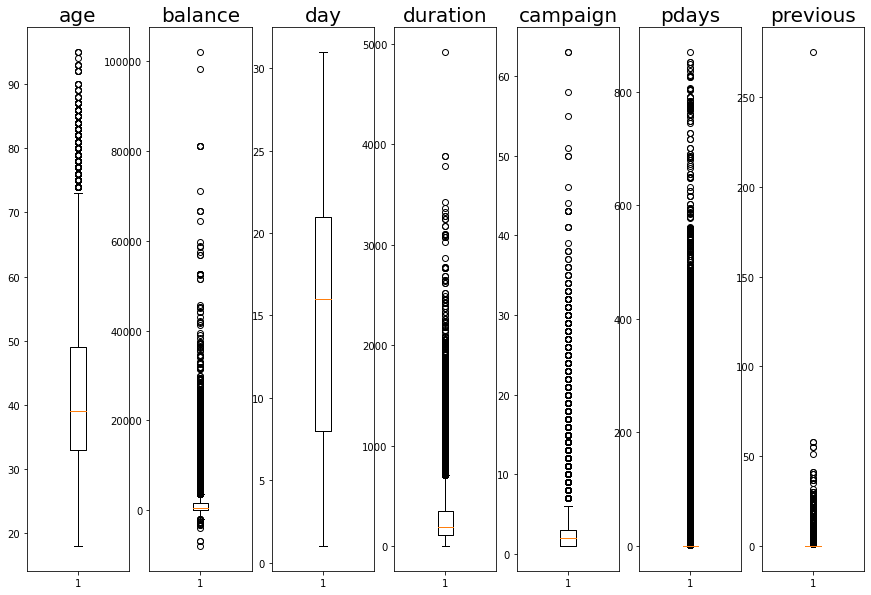

In [7]:
# Define function to detect outliers using Interquartile range
plt.figure(figsize=(15,10))
column=['age','balance','day','duration','campaign','pdays','previous']
for i in range(len(column)):
    plt.subplot(1, len(column), i+1) 
    plt.boxplot(df[column[i]]) 
    plt.title(column[i],fontsize=20)
    
plt.show()

In [9]:
def copy_df(df):
    return df.copy()
# Remove the outliers 
def outliers(df, column):
    low = np.quantile(df[column], 0.05)
    high = np.quantile(df[column], 0.95)
    return df[df[column].between(low, high, inclusive = True)]

df = (df.pipe(copy_df).
              pipe(outliers, "age").
              pipe(outliers, "balance").
              pipe(outliers, "duration").
              pipe(outliers, "previous"))


/Users/zunushrestha/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  import sys


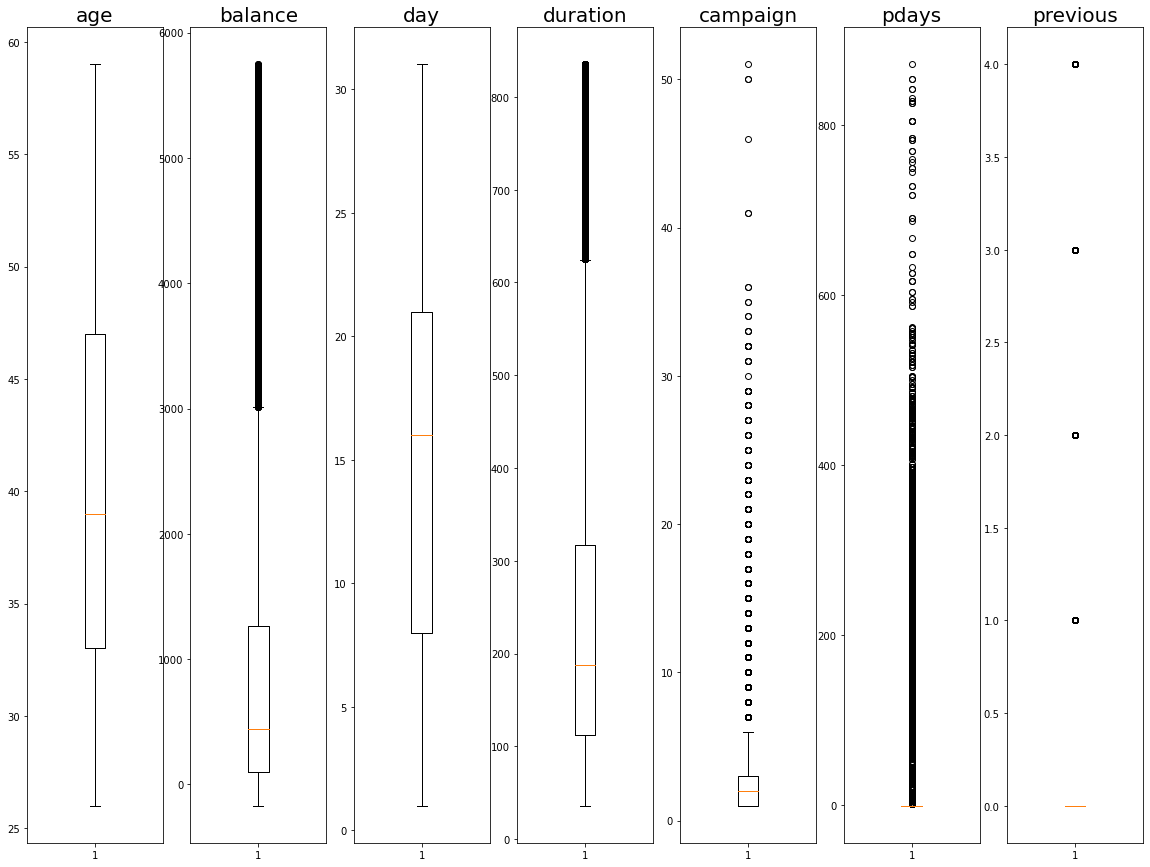

In [10]:
plt.figure(figsize=(20,15))
for i in range(len(column)):
    plt.subplot(1, len(column), i+1) 
    plt.boxplot(df[column[i]]) 
    plt.title(column[i],fontsize=20)
    
plt.show()

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56359,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
56360,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
56363,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
56364,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes


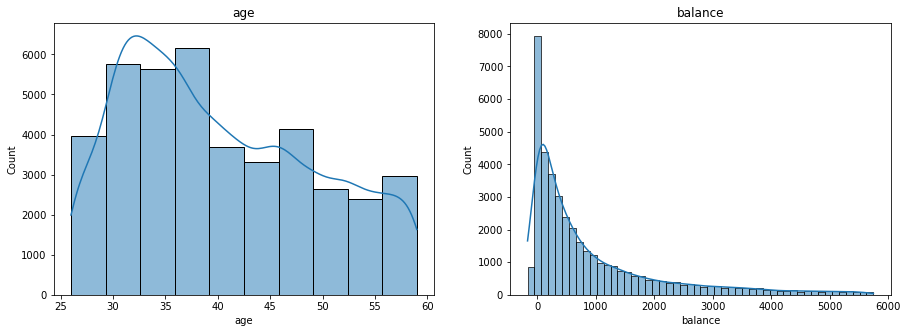

In [12]:
# Some graphics about the descriptive statitics variables

col_num = ['age', 'balance']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax= ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

## Data Visualization

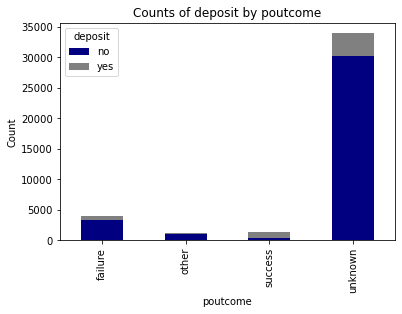

In [39]:
# bar chart for outcome of previous marketing campaign (poutcome)
types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True',color=['navy','grey'])

# Customize the plot
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.title('Counts of deposit by poutcome')
plt.legend(title='deposit')

plt.show()

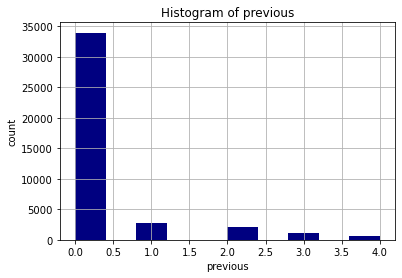

In [44]:
#histogram of previous
df['previous'].hist(color='navy')
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

Large number of customer were not contacted before

In [45]:
# Number of customers who were not contacted before but still made a deposit
count = df[(df['previous'] == 0) & (df['deposit'] == 'yes')].shape[0]
print("Number of customers who were not contacted before but still made a deposit:", count)


Number of customers who were not contacted before but still made a deposit: 3700


<AxesSubplot:xlabel='month'>

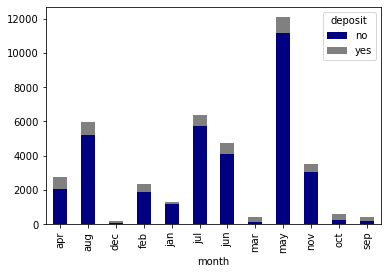

In [92]:
#bar chart for month
types = df.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True',color=['navy','grey'])

Most of the clients were contacted on May

<AxesSubplot:xlabel='day'>

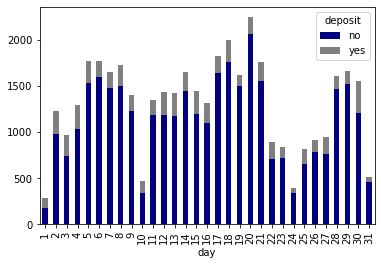

In [93]:
# group by days to display bar chart
types = df.groupby("day")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True',color=['navy','grey'])

Most of the clients were contacted in the middle of month

In [94]:
df["job"].value_counts()

management       8958
blue-collar      8694
technician       7107
admin.           4923
services         3797
self-employed    1488
entrepreneur     1394
unemployed       1273
retired          1123
housemaid        1105
student           551
unknown           259
Name: job, dtype: int64

<AxesSubplot:xlabel='job'>

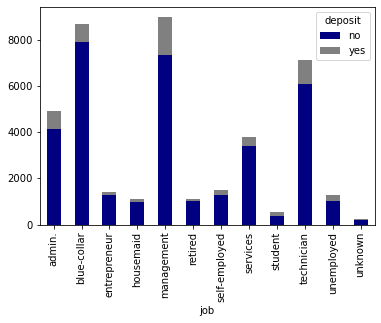

In [95]:
# group by job to display bar chart
types = df.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True',color=['navy','grey'])

The largest client group are management followed  by blue collar and technician

#### Customer demographic

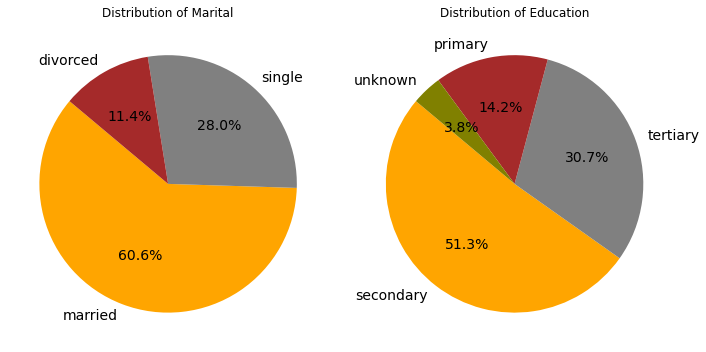

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Columns to create pie charts for
columns = ['marital', 'education', ]

# Define colors for pie chart slices
colors = ['orange', 'grey', 'brown', 'olive', 'indigo']

# Plotting pie charts for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(10, 5))

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140,colors=colors,textprops={'fontsize': 14})
    axes[i].set_title(f'Distribution of {col.capitalize()}')

plt.tight_layout()
plt.show()


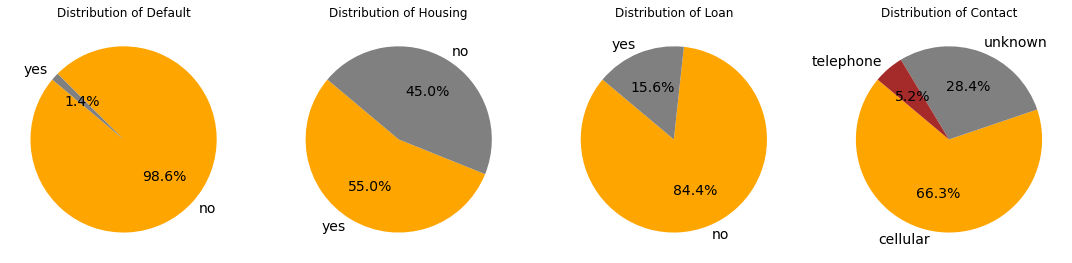

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Columns to create pie charts for
columns = ['default','housing','loan','contact' ]

# Define colors for pie chart slices
colors = ['orange', 'grey', 'brown', 'olive', 'indigo']

# Plotting pie charts for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 10))

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140,colors=colors,textprops={'fontsize': 14})
    axes[i].set_title(f'Distribution of {col.capitalize()}')

plt.tight_layout()
plt.show()

## Preprocessing

In [97]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [98]:
# Convert all categorical variable into numerical variable
df['deposit']= label_encoder.fit_transform(df['deposit'])
df['default']= label_encoder.fit_transform(df['default'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])

In [99]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1
8,37,technician,married,secondary,0,1,1,0,unknown,6,may,608,1,-1,0,unknown,1
10,38,admin.,single,secondary,0,100,1,0,unknown,7,may,786,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56359,36,management,single,secondary,0,1511,1,0,cellular,16,nov,270,1,-1,0,unknown,1
56360,37,management,married,tertiary,0,1428,0,0,cellular,16,nov,333,2,-1,0,unknown,0
56363,53,management,married,tertiary,0,583,0,0,cellular,17,nov,226,1,184,4,success,1
56364,34,admin.,single,secondary,0,557,0,0,cellular,17,nov,224,1,-1,0,unknown,1
